In [1]:
#Load the dataset
import pandas as pd
forest_data = pd.read_csv('C:/Users/clare/Downloads/Machine Learning/Assignment/forestdata.csv')

#Display the first few rows of the dataframe to understand its structure and types of data it contains
forest_data.head()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


In [2]:
# Get a concise summary of the dataframe, including the data types and non-null values
print(forest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   collector.id    456 non-null    int64  
 1   c.score         456 non-null    float64
 2   l.score         455 non-null    float64
 3   rain            455 non-null    float64
 4   tree.age        455 non-null    float64
 5   surface.litter  456 non-null    float64
 6   wind.intensity  455 non-null    float64
 7   humidity        453 non-null    float64
 8   tree.density    456 non-null    float64
 9   month           456 non-null    int64  
 10  time.of.day     456 non-null    object 
 11  fire            456 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 42.9+ KB
None


In [3]:
# Display statistical summary of numeric columns
print(forest_data.describe())

       collector.id      c.score     l.score        rain    tree.age  \
count    456.000000   456.000000  455.000000  455.000000  455.000000   
mean       5.730263    22.857656    3.010865    0.245926   41.681767   
std        2.921622   130.770478    0.317467    0.200932   49.059173   
min        1.000000     6.981000    2.718282    0.000000    6.802000   
25%        3.000000    11.697500    2.796446    0.095999   17.740000   
50%        6.000000    13.275000    2.888364    0.165706   24.600000   
75%        8.000000    16.040000    3.123109    0.380691   45.410000   
max       11.000000  1990.200000    4.629025    1.000000  542.200000   

       surface.litter  wind.intensity    humidity  tree.density       month  \
count      456.000000      455.000000  453.000000    456.000000  456.000000   
mean         6.623185        3.132817   56.231788      0.613652    6.732456   
std          0.563944        0.081336    6.122037      0.067054    3.429465   
min          5.221436        2.9263

In [4]:
# Check for missing values in each column
print(forest_data.isnull().sum())

collector.id      0
c.score           0
l.score           1
rain              1
tree.age          1
surface.litter    0
wind.intensity    1
humidity          3
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64


In [5]:
# Display data types of each column
print(forest_data.dtypes)

collector.id        int64
c.score           float64
l.score           float64
rain              float64
tree.age          float64
surface.litter    float64
wind.intensity    float64
humidity          float64
tree.density      float64
month               int64
time.of.day        object
fire                int64
dtype: object


In [6]:
# Example for a categorical column named 'time.of.day'
print(forest_data['time.of.day'].unique())

['afternoon' 'morning' 'night' 'morni7ng']


In [7]:
# For each column, check the number of unique values to identify potential categorical variables
for col in forest_data.columns:
    print(f"{col}: {forest_data[col].nunique()} unique values")

collector.id: 11 unique values
c.score: 385 unique values
l.score: 432 unique values
rain: 434 unique values
tree.age: 426 unique values
surface.litter: 440 unique values
wind.intensity: 345 unique values
humidity: 32 unique values
tree.density: 401 unique values
month: 12 unique values
time.of.day: 4 unique values
fire: 2 unique values


In [8]:
# Example for a categorical variable
print(forest_data['time.of.day'].value_counts())

night        172
morning      148
afternoon    135
morni7ng       1
Name: time.of.day, dtype: int64


In [9]:
# Check variance of each numeric variable
print(forest_data.var())

collector.id          8.535873
c.score           17100.918002
l.score               0.100785
rain                  0.040374
tree.age           2406.802496
surface.litter        0.318033
wind.intensity        0.006616
humidity             37.479341
tree.density          0.004496
month                11.761230
fire                  0.233198
dtype: float64


C:\Users\clare\AppData\Local\Temp\ipykernel_26932\279426558.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(forest_data.var())


In [10]:
# Correlation matrix for numeric variables
print(forest_data.corr())

                collector.id   c.score   l.score      rain  tree.age  \
collector.id        1.000000 -0.050264 -0.007252  0.004176 -0.001664   
c.score            -0.050264  1.000000  0.010255  0.012243 -0.009639   
l.score            -0.007252  0.010255  1.000000  0.905248  0.637844   
rain                0.004176  0.012243  0.905248  1.000000  0.693742   
tree.age           -0.001664 -0.009639  0.637844  0.693742  1.000000   
surface.litter      0.017166  0.015894  0.653907  0.818463  0.708016   
wind.intensity      0.014691 -0.040875  0.431780  0.468918  0.135609   
humidity            0.070920  0.009082 -0.676025 -0.607190 -0.251645   
tree.density        0.006196  0.013457  0.824831  0.917459  0.551867   
month               0.040819 -0.000791  0.085508  0.122157  0.118422   
fire                0.003607 -0.031894  0.564577  0.684050  0.501015   

                surface.litter  wind.intensity  humidity  tree.density  \
collector.id          0.017166        0.014691  0.070920     

C:\Users\clare\AppData\Local\Temp\ipykernel_26932\3236682381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(forest_data.corr())


C:\Users\clare\AppData\Local\Temp\ipykernel_26932\2620069479.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = forest_data.corr()


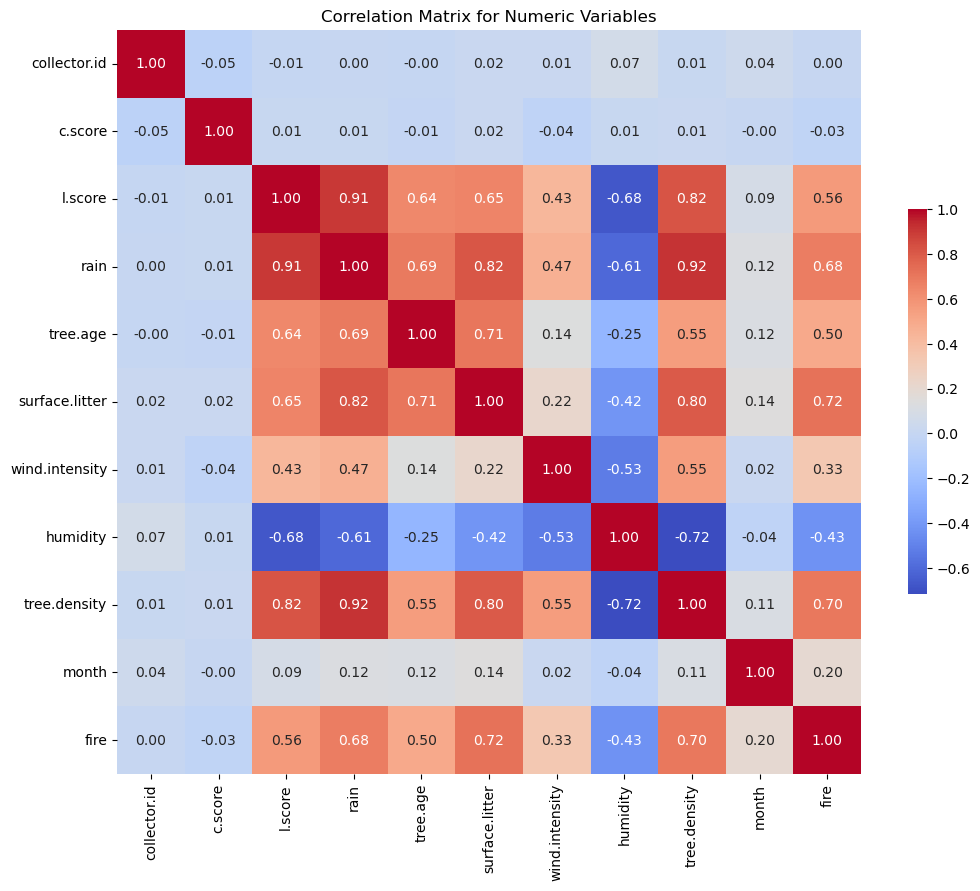

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = forest_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Numeric Variables')
plt.show()

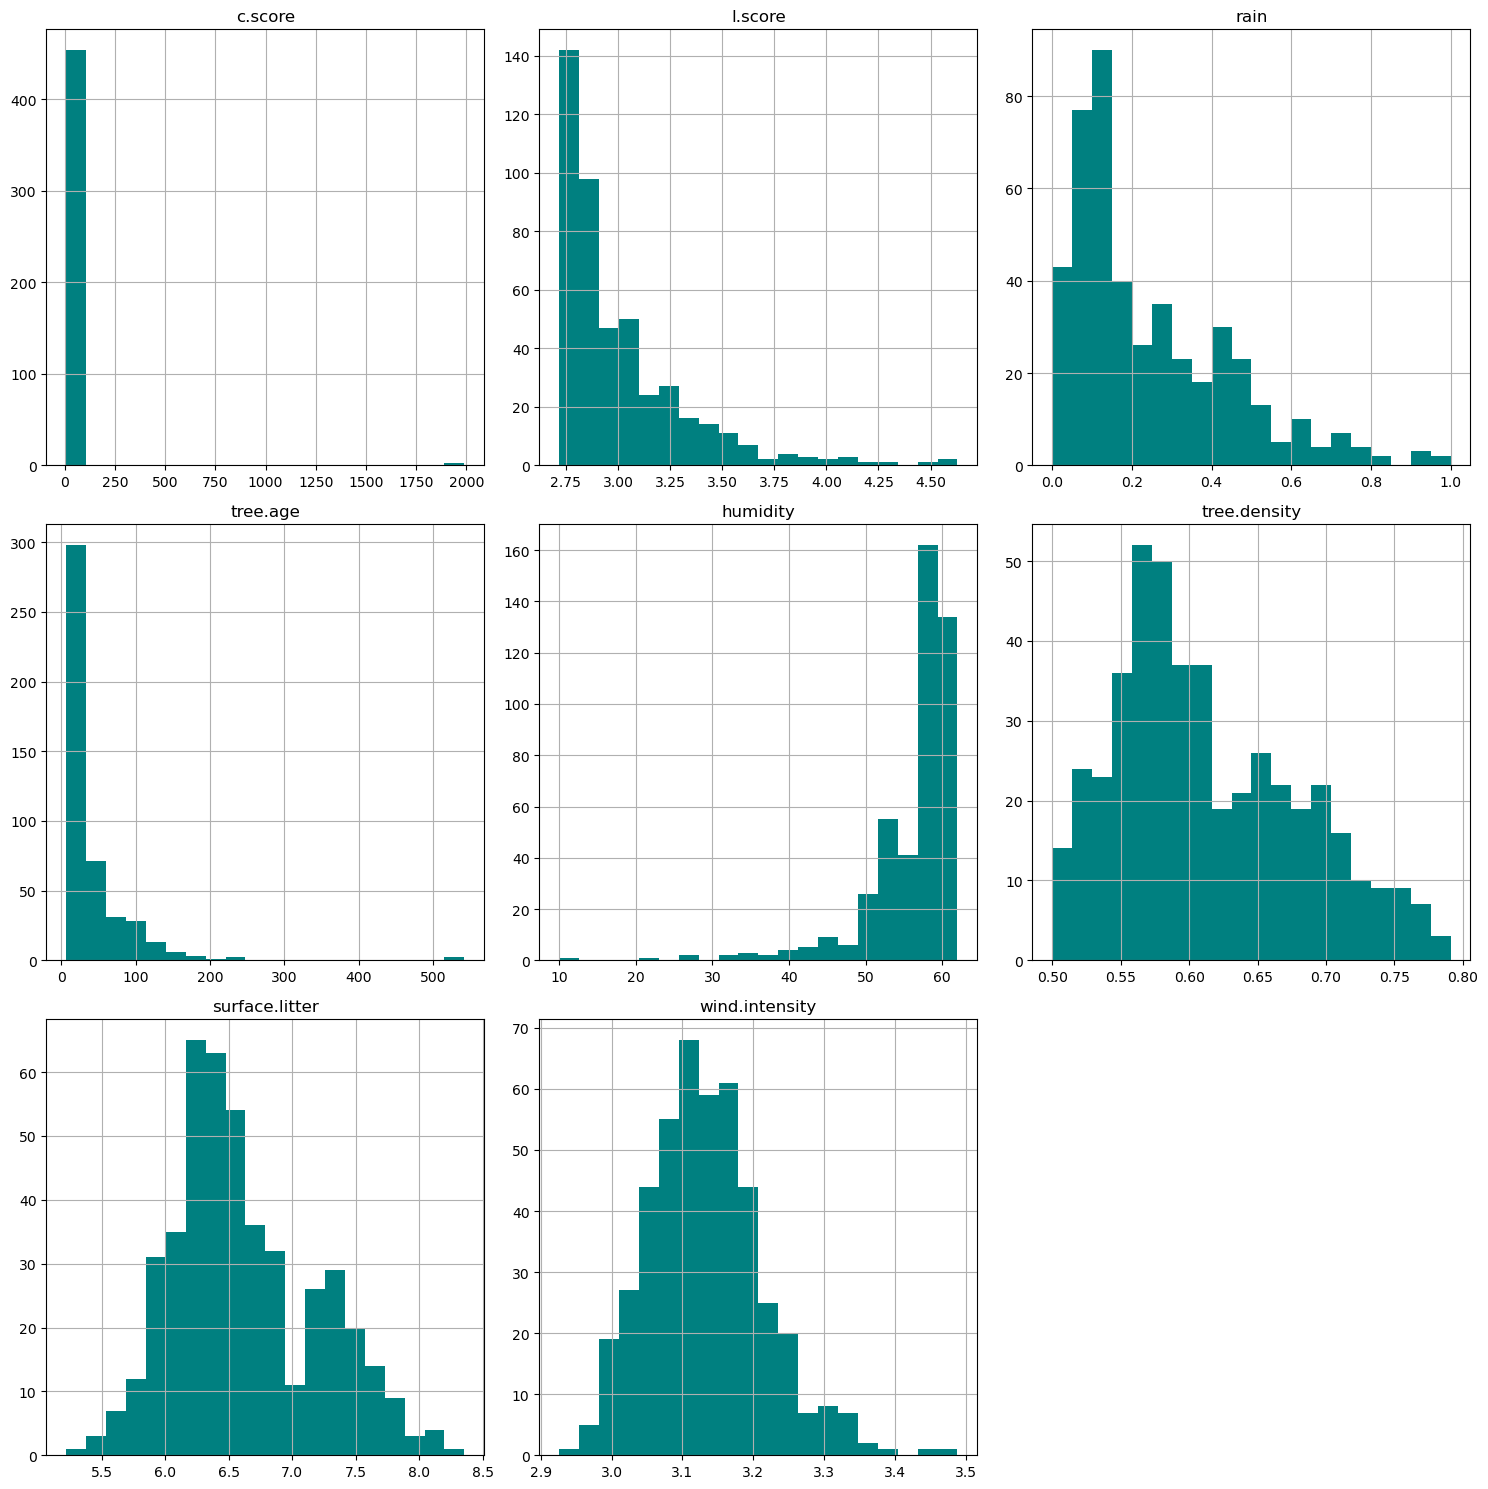

In [12]:
import matplotlib.pyplot as plt

# Selecting columns for histogram plotting
columns_to_plot = ['c.score', 'l.score', 'rain', 'tree.age', 'humidity', 'tree.density', 'surface.litter', 'wind.intensity']

# Plotting histograms for selected columns
plt.figure(figsize=(15, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    forest_data[column].hist(bins=20, color='teal')
    plt.title(column)

plt.tight_layout()
plt.show()


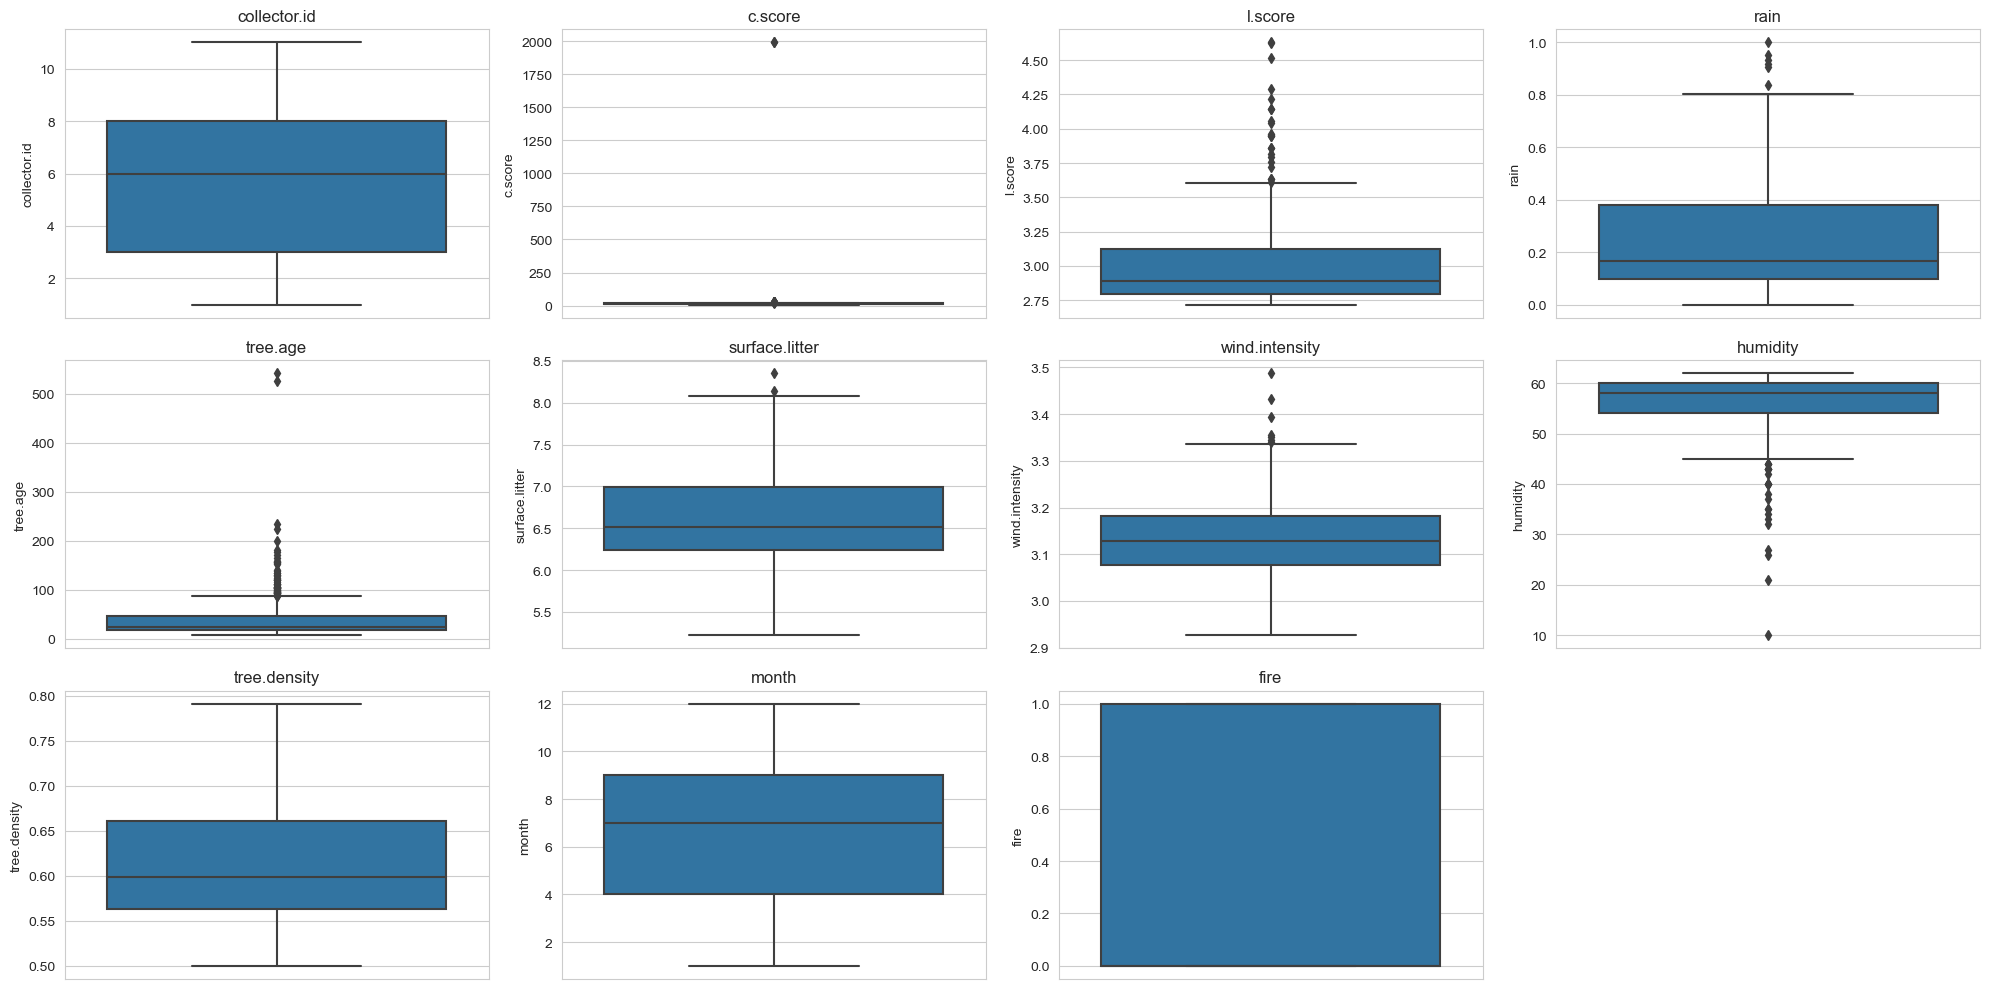

In [13]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating box plots for all numerical variables
numerical_features = forest_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=forest_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [14]:
# Check balance of the target variable
print(forest_data['fire'].value_counts(normalize=True))

0    0.631579
1    0.368421
Name: fire, dtype: float64


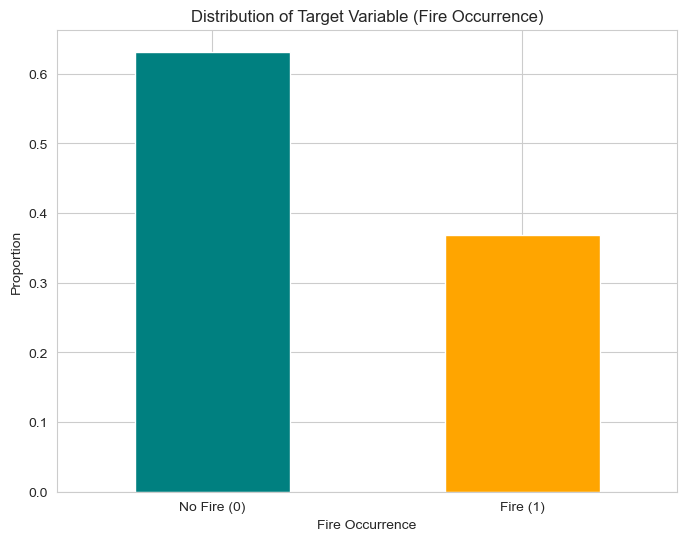

In [15]:
import matplotlib.pyplot as plt

# Assuming forest_data['fire'] contains your target variable
fire_counts = forest_data['fire'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
fire_counts.plot(kind='bar', color=['teal', 'orange'])
plt.title('Distribution of Target Variable (Fire Occurrence)')
plt.xlabel('Fire Occurrence')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Fire (0)', 'Fire (1)'], rotation=0)
plt.show()


In [16]:
forest_data = forest_data.drop('collector.id', axis=1)

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Remove 'collector.id' column if it's not relevant to the modeling


# Define features (X) and target (y)
X = forest_data.drop('fire', axis=1)
y = forest_data['fire']

# Split into training (60%) and temporary sets (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temporary set into validation and test sets (each 20% of the original dataset)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [18]:
from sklearn.impute import SimpleImputer

# Identify numerical columns with missing values
numerical_cols_with_missing = [col for col in X_train.columns 
                               if X_train[col].isnull().any() 
                               and pd.api.types.is_numeric_dtype(X_train[col])]

# Initialize the imputer for numerical columns
num_imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train.loc[:, numerical_cols_with_missing] = num_imputer.fit_transform(X_train[numerical_cols_with_missing])

# Transform the validation and test data using the same imputer
X_validate.loc[:, numerical_cols_with_missing] = num_imputer.transform(X_validate[numerical_cols_with_missing])
X_test.loc[:, numerical_cols_with_missing] = num_imputer.transform(X_test[numerical_cols_with_missing])

# Verification: Check if there are any missing values left
print("NaN counts in X_train after imputation:\n", X_train.isnull().sum())
print("NaN counts in X_validate after imputation:\n", X_validate.isnull().sum())
print("NaN counts in X_test after imputation:\n", X_test.isnull().sum())


NaN counts in X_train after imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
NaN counts in X_validate after imputation:
 c.score           0
l.score           1
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
NaN counts in X_test after imputation:
 c.score           0
l.score           0
rain              1
tree.age          0
surface.litter    0
wind.intensity    1
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64


In [19]:
# Calculate medians from the training data
rain_median = X_train['rain'].median()
wind_intensity_median = X_train['wind.intensity'].median()
l_score_median = X_train['l.score'].median()

# Fill NaN values in 'rain' and 'wind.intensity' in X_test with their respective medians
if 'rain' in X_test.columns:
    X_test['rain'].fillna(value=rain_median, inplace=True)
if 'wind.intensity' in X_test.columns:
    X_test['wind.intensity'].fillna(value=wind_intensity_median, inplace=True)

# Similarly, fill NaN values in 'l.score' in X_validate
if 'l.score' in X_validate.columns:
    X_validate['l.score'].fillna(value=l_score_median, inplace=True)

# Verify if the issue is resolved
print("Re-checking NaN counts in X_validate after manual imputation:\n", X_validate.isnull().sum())
print("Re-checking NaN counts in X_test after manual imputation:\n", X_test.isnull().sum())


Re-checking NaN counts in X_validate after manual imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
Re-checking NaN counts in X_test after manual imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64


In [20]:
columns_to_check = ['tree.age', 'humidity', 'c.score', 'l.score', 'rain', 'surface.litter','wind.intensity', 'tree.density']

# Initialize a dictionary to hold the count of outliers for each column
outliers_count = {}

for col in columns_to_check:
    # Calculate the 1st and 99th percentiles for each column
    lower_bound, upper_bound = X_train[col].quantile([0.01, 0.99])
    
    # Identify outliers for the current column
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    
    # Store the number of outliers found
    outliers_count[col] = len(outliers)

# Print the number of outliers found for each column
for col, count in outliers_count.items():
    if count > 0:
        print(f"Number of outliers in '{col}': {count}")
    else:
        print(f"No outliers found in '{col}'")


Number of outliers in 'tree.age': 6
Number of outliers in 'humidity': 3
Number of outliers in 'c.score': 6
Number of outliers in 'l.score': 3
Number of outliers in 'rain': 3
Number of outliers in 'surface.litter': 6
Number of outliers in 'wind.intensity': 6
Number of outliers in 'tree.density': 3


In [21]:
# Specify the columns for which you want to handle outliers
columns_to_handle = ['tree.age', 'humidity', 'c.score', 'l.score', 'rain', 'surface.litter', 'wind.intensity', 'tree.density']

# Loop over each column to calculate the bounds and clip the values
for col in columns_to_handle:
    # Calculate the 1st and 99th percentiles for each column in the training data
    lower_bound, upper_bound = X_train[col].quantile([0.01, 0.99])
    
    # Clip values in the training data at the 1st and 99th percentiles
    X_train[col] = X_train[col].clip(lower_bound, upper_bound)
    
    # It's important to apply the same clipping bounds to validation and test sets to maintain consistency
    # and avoid data leakage. These bounds are derived solely from the training data.
    X_validate[col] = X_validate[col].clip(lower_bound, upper_bound)
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)

print("Outlier handling completed.")


Outlier handling completed.


In [22]:
print("NaN values in X_validate after imputation:", X_validate.isnull().any().any())


NaN values in X_validate after imputation: False


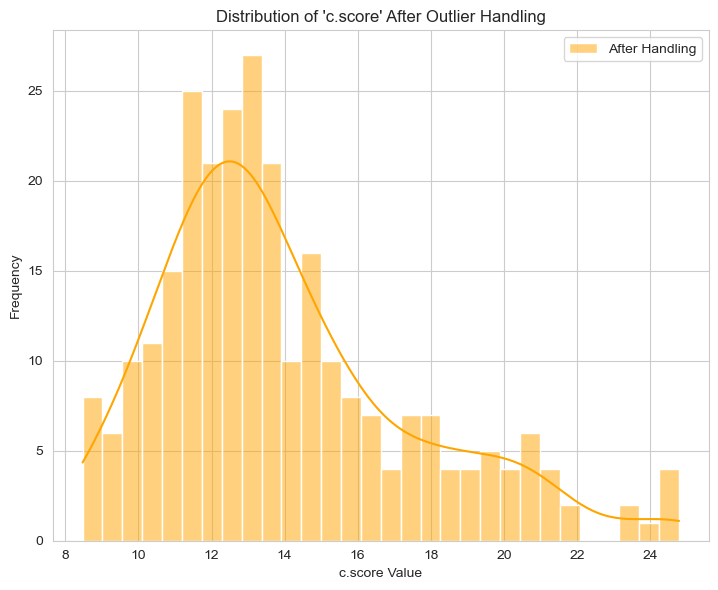

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'original_X_train' holds the original training data before outlier handling
# 'X_train' is after outlier handling has been applied
col = 'c.score'

# Plotting the distribution before and after outlier handling
plt.figure(figsize=(14, 6))

# After outlier handling
plt.subplot(1, 2, 2)
sns.histplot(X_train[col], color='orange', kde=True, bins=30, label='After Handling')
plt.title(f"Distribution of '{col}' After Outlier Handling")
plt.xlabel(f"{col} Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
print(X_train.columns)


Index(['c.score', 'l.score', 'rain', 'tree.age', 'surface.litter',
       'wind.intensity', 'humidity', 'tree.density', 'month', 'time.of.day'],
      dtype='object')


In [25]:
# Correcting the misspelling in all datasets
X_train['time.of.day'] = X_train['time.of.day'].replace({'morni7ng': 'morning'})
X_validate['time.of.day'] = X_validate['time.of.day'].replace({'morni7ng': 'morning'})
X_test['time.of.day'] = X_test['time.of.day'].replace({'morni7ng': 'morning'})


In [26]:
target_balance = y_train.value_counts(normalize=True)

target_balance

0    0.677656
1    0.322344
Name: fire, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Assuming the dataset is already loaded and split into X_train, X_validate, X_test, y_train, y_validate, y_test

# Identify numerical columns (excluding categorical columns for encoding later)
numerical_cols = X_train.columns.difference(['month', 'time.of.day'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply the same transformation to the validation and test sets
X_validate[numerical_cols] = scaler.transform(X_validate[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'month' and 'time.of.day' are the only categorical variables needing encoding
categorical_features = ['month', 'time.of.day']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the training data only to avoid data leakage
encoder.fit(X_train[categorical_features])

# Transform the training, validation, and test sets and convert to DataFrames
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_validate_encoded = pd.DataFrame(encoder.transform(X_validate[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_validate.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Now, drop the original categorical columns from X_train, X_validate, and X_test
X_train = X_train.drop(columns=categorical_features)
X_validate = X_validate.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenate the encoded columns back to X_train, X_validate, and X_test
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_validate = pd.concat([X_validate, X_validate_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


In [29]:
print("NaN values in X_train after [Step Name]:", X_train.isnull().any().any())


NaN values in X_train after [Step Name]: False


In [30]:
print("NaN values in X_validate after imputation:", X_validate.isnull().any().any())


NaN values in X_validate after imputation: False


In [31]:
print(X_train.dtypes)
print("Are there any non-numeric columns left in X_train?", X_train.select_dtypes(include=['object']).columns.tolist())

c.score                  float64
l.score                  float64
rain                     float64
tree.age                 float64
surface.litter           float64
wind.intensity           float64
humidity                 float64
tree.density             float64
month_1                  float64
month_2                  float64
month_3                  float64
month_4                  float64
month_5                  float64
month_6                  float64
month_7                  float64
month_8                  float64
month_9                  float64
month_10                 float64
month_11                 float64
month_12                 float64
time.of.day_afternoon    float64
time.of.day_morning      float64
time.of.day_night        float64
dtype: object
Are there any non-numeric columns left in X_train? []


In [32]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assume X_train, y_train have already been preprocessed to handle missing values

# Apply SMOTE only on the training set to avoid data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are balanced and can be used for training models

# Check the balance of the target variable in the training set after SMOTE
target_balance = pd.Series(y_train_smote).value_counts(normalize=True)
print("Target variable distribution after SMOTE:")
print(target_balance)

# Continue with your model training process using X_train_smote, y_train_smote
# Remember, do not apply SMOTE to X_validate or X_test


Target variable distribution after SMOTE:
1    0.5
0    0.5
Name: fire, dtype: float64


In [33]:
print("NaN values in X_train after [Step Name]:", X_train.isnull().any().any())


NaN values in X_train after [Step Name]: False


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE-balanced training data
decision_tree.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(random_state=42)

Decision Tree - Validation Metrics:
Accuracy: 0.9340659340659341
Precision: 0.9318181818181818
Recall: 0.9318181818181818
F1 Score: 0.9318181818181818


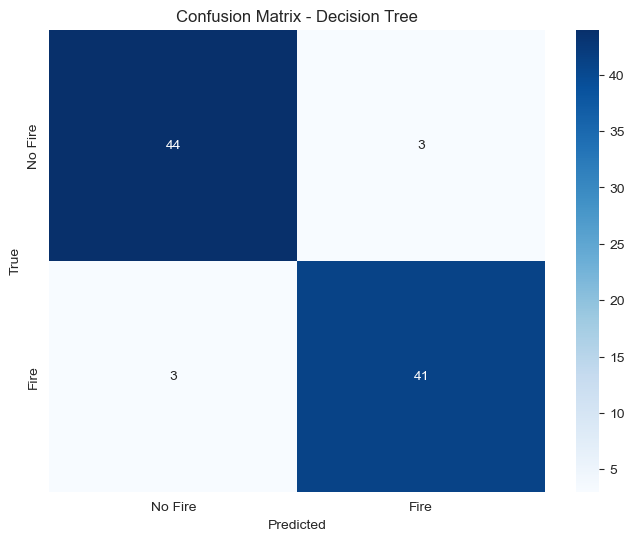

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred_val_dt = decision_tree.predict(X_validate)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_validate, y_pred_val_dt)
precision_dt = precision_score(y_validate, y_pred_val_dt)
recall_dt = recall_score(y_validate, y_pred_val_dt)
f1_dt = f1_score(y_validate, y_pred_val_dt)

print(f"Decision Tree - Validation Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

# Confusion Matrix
cm_dt = confusion_matrix(y_validate, y_pred_val_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


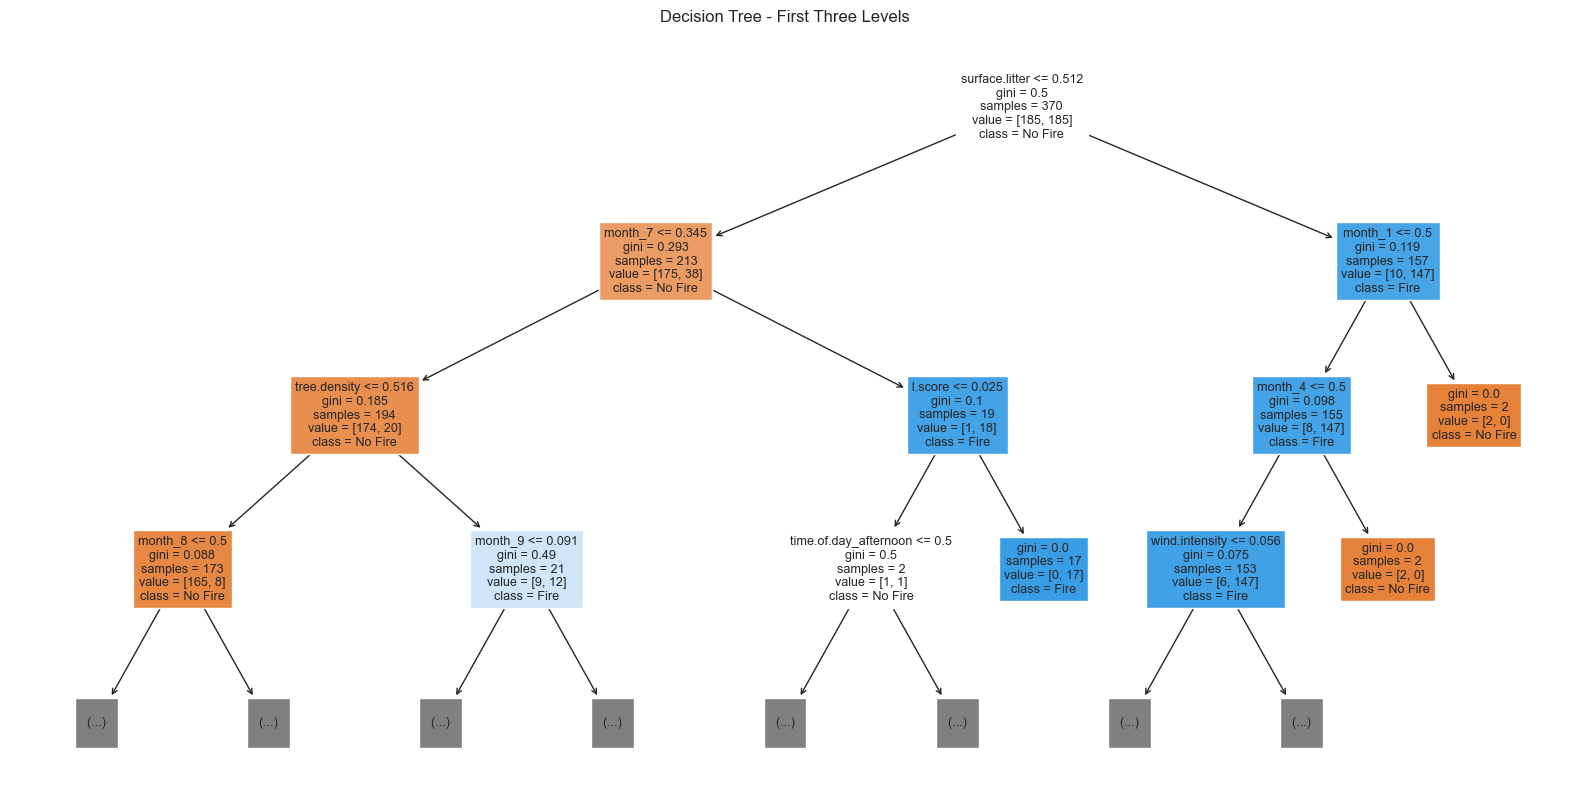

In [36]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, filled=True, feature_names=X_train_smote.columns, class_names=['No Fire', 'Fire'], max_depth=3)
plt.title("Decision Tree - First Three Levels")
plt.show()


In [37]:
from sklearn.model_selection import cross_validate

# Initialize the Decision Tree model
decision_tree_cv = DecisionTreeClassifier(random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation and capture multiple metrics
cv_results_dt = cross_validate(decision_tree_cv, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Calculate the mean of each metric
mean_accuracy_dt = cv_results_dt['test_accuracy'].mean()
mean_precision_dt = cv_results_dt['test_precision'].mean()
mean_recall_dt = cv_results_dt['test_recall'].mean()
mean_f1_dt = cv_results_dt['test_f1'].mean()

print(f"Decision Tree Cross-Validation Metrics:")
print(f"Mean Accuracy: {mean_accuracy_dt}")
print(f"Mean Precision: {mean_precision_dt}")
print(f"Mean Recall: {mean_recall_dt}")
print(f"Mean F1 Score: {mean_f1_dt}")


Decision Tree Cross-Validation Metrics:
Mean Accuracy: 0.908108108108108
Mean Precision: 0.895310421286031
Mean Recall: 0.9243243243243244
Mean F1 Score: 0.9079747649610663


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9108108108108108


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Adjust the GridSearchCV object for Precision
grid_search_precision = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                     param_grid=param_grid, 
                                     cv=5, 
                                     scoring='precision', 
                                     n_jobs=-1)

# Perform the grid search
grid_search_precision.fit(X_train_smote, y_train_smote)

# Best parameters and precision score
print("Best Parameters for Precision:", grid_search_precision.best_params_)
print("Best Cross-Validation Precision Score:", grid_search_precision.best_score_)


Best Parameters for Precision: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Precision Score: 0.9128885700621712


In [40]:
# Adjust the GridSearchCV object for Recall
grid_search_recall = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                  param_grid=param_grid, 
                                  cv=5, 
                                  scoring='recall', 
                                  n_jobs=-1)

# Perform the grid search
grid_search_recall.fit(X_train_smote, y_train_smote)

# Best parameters and recall score
print("Best Parameters for Recall:", grid_search_recall.best_params_)
print("Best Cross-Validation Recall Score:", grid_search_recall.best_score_)


Best Parameters for Recall: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Recall Score: 0.9297297297297297


In [41]:
# Adjust the GridSearchCV object for F1 Score
grid_search_f1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                              param_grid=param_grid, 
                              cv=5, 
                              scoring='f1', 
                              n_jobs=-1)

# Perform the grid search
grid_search_f1.fit(X_train_smote, y_train_smote)

# Best parameters and F1 score
print("Best Parameters for F1 Score:", grid_search_f1.best_params_)
print("Best Cross-Validation F1 Score:", grid_search_f1.best_score_)


Best Parameters for F1 Score: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation F1 Score: 0.9114530490512699


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Extract the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize the Decision Tree model with the best hyperparameters
tuned_decision_tree = DecisionTreeClassifier(**best_params)

# Re-train the model on the SMOTE-balanced training data
tuned_decision_tree.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(min_samples_split=10)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the validation set
y_pred_val_tuned = tuned_decision_tree.predict(X_validate)

# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_validate, y_pred_val_tuned)
precision_tuned = precision_score(y_validate, y_pred_val_tuned)
recall_tuned = recall_score(y_validate, y_pred_val_tuned)
f1_tuned = f1_score(y_validate, y_pred_val_tuned)

# Display the metrics
print("Tuned Decision Tree - Validation Metrics:")
print(f"Accuracy: {accuracy_tuned}")
print(f"Precision: {precision_tuned}")
print(f"Recall: {recall_tuned}")
print(f"F1 Score: {f1_tuned}")


Tuned Decision Tree - Validation Metrics:
Accuracy: 0.9230769230769231
Precision: 0.9111111111111111
Recall: 0.9318181818181818
F1 Score: 0.9213483146067416


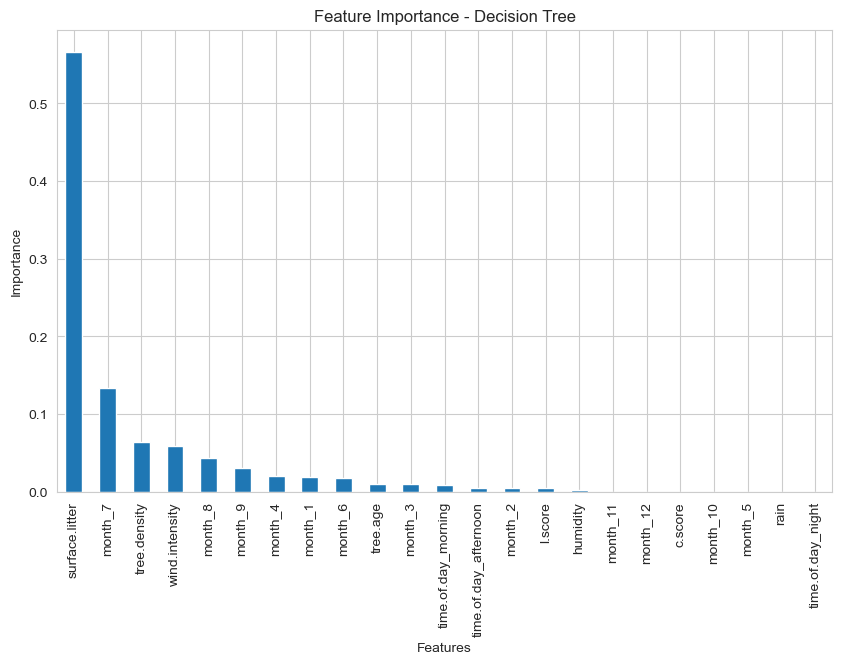

In [44]:
feature_importances_dt = decision_tree.feature_importances_
importances_dt = pd.Series(feature_importances_dt, index=X_train_smote.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_dt.plot(kind='bar')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming grid_search_recall has been previously executed to find the best parameters for recall
best_params_for_recall_decision_tree = grid_search_recall.best_params_

# Combine the training and validation sets
X_train_full = pd.concat([X_train, X_validate])
y_train_full = pd.concat([y_train, y_validate])

# Apply SMOTE to the combined dataset to balance the classes
smote = SMOTE(random_state=42)
X_train_full_smote, y_train_full_smote = smote.fit_resample(X_train_full, y_train_full)

# Initialize the decision tree classifier with the best hyperparameters for recall
decision_tree_full = DecisionTreeClassifier(**best_params_for_recall_decision_tree, random_state=42)

# Retrain the model on the SMOTE-balanced combined dataset
decision_tree_full.fit(X_train_full_smote, y_train_full_smote)

# Evaluate the model on the test set
y_pred_test = decision_tree_full.predict(X_test)

# Calculate and display the evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("Decision Tree (Tuned for Recall) - Test Set Evaluation:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")  # Focus on recall
print(f"Test F1 Score: {test_f1}")


Decision Tree (Tuned for Recall) - Test Set Evaluation:
Test Accuracy: 0.9021739130434783
Test Precision: 0.8857142857142857
Test Recall: 0.8611111111111112
Test F1 Score: 0.8732394366197184


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming grid_search_f1 has been previously executed to find the best parameters for F1 score
best_params_for_f1_decision_tree = grid_search_f1.best_params_

# Combine the training and validation sets
X_train_full = pd.concat([X_train, X_validate])
y_train_full = pd.concat([y_train, y_validate])

# Apply SMOTE to the combined dataset to balance the classes
smote = SMOTE(random_state=42)
X_train_full_smote, y_train_full_smote = smote.fit_resample(X_train_full, y_train_full)

# Initialize the decision tree classifier with the best hyperparameters for F1 score
decision_tree_full = DecisionTreeClassifier(**best_params_for_f1_decision_tree, random_state=42)

# Retrain the model on the SMOTE-balanced combined dataset
decision_tree_full.fit(X_train_full_smote, y_train_full_smote)

# Evaluate the model on the test set
y_pred_test = decision_tree_full.predict(X_test)

# Calculate and display the evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)  # Now the focus is on this metric

print("Decision Tree (Tuned for F1 Score) - Test Set Evaluation:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")  # Highlighting the optimized metric


Decision Tree (Tuned for F1 Score) - Test Set Evaluation:
Test Accuracy: 0.9021739130434783
Test Precision: 0.8857142857142857
Test Recall: 0.8611111111111112
Test F1 Score: 0.8732394366197184
